# GraviPy - tutorial



To start working with the gravipy package you must load the package and initialize a pretty-printing mode in Jupyter environment
### 载入函数

In [207]:
from gravipy.tensorial import * # import GraviPy package
from sympy import init_printing
import inspect
init_printing()

### Contravariant: 逆变   
### Covariant: 协变

### The next step is to choose coordinates and define a metric tensor of a particular space. 

Let's take, for example, the Schwarzschild metric - vacuum solution to the Einstein's field equations which describes the gravitational field of a spherical mass distribution.

# 1. 坐标系和度规张量 ( _Coordinates_ and _MetricTensor_ )

### define some symbolic variables 
### 定义变量符号

In [208]:
# for (G=c=1)
t, r, theta, phi, M = symbols('t, r, \\theta, \phi, M')

In [209]:
# for SI units
t, r, theta, phi, M = symbols('t, r, \\theta, \phi, GM/c^2')

## create a coordinate four-vector object instantiating 
## the Coordinates class
## $x^{\mu}$

In [120]:
x = Coordinates('\mu', [t, r, theta, phi])
x.components

### Each component of any tensor object, can be computed by calling the appropriate instance of the _GeneralTensor_ subclass with indices as arguments. 
### The covariant indices take positive integer values (1, 2, ..., dim).  协变指标使用正数!!
### The contravariant indices take negative values (-1, -2, ..., -dim). 逆变指标使用负数!!

In [123]:
x(-All)

In [124]:
#x.symbol
x(-1)

### 定义张量对角元素

### Schwarzschild metric

In [125]:
# define a matrix of a metric tensor components
Metric = diag(-(1-2*M/r), 1/(1-2*M/r), r**2, r**2*sin(theta)**2)  

### 测试度规

In [146]:
# define a matrix of a metric tensor components
Metric = diag(-(1-2*M/r), 1, r**2, r**2*sin(theta)**2)  

### 创建度规张量 $g$

In [147]:
# create a metric tensor object instantiating the MetricTensor class
g = MetricTensor('g_{\mu\nu}', x, Metric)

In [148]:
#MetricTensor?
g.symbol

## $g_{\mu\nu}$

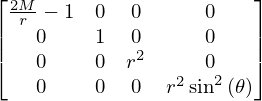

In [149]:
g(All, All)

In [150]:
g(All, 4)

## $g^{\mu \nu}$

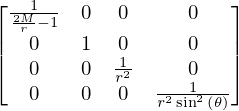

In [151]:
g(-All, -All)

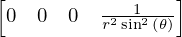

In [131]:
g(-All, -4)

## $g^{\mu}_{\ \nu} = \delta^{\mu}_{\ \nu}$

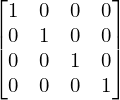

In [109]:
g(-All, All)

## $g_{\mu\nu} x^{\mu} = x_{\nu}$

In [77]:
x(All)

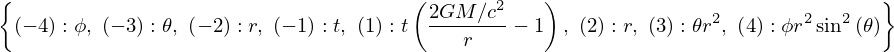

In [95]:
x.components

Matrix representation of a tensor can be obtained in the following way

# 2. 预定义张量 (Predefined _Tensor_ Classes)

The GraviPy package contains a number of the _Tensor_ subclasses that can be used to calculate a tensor components. The _Tensor_ subclasses available in the current version of GraviPy package are

In [60]:
print([cls.__name__ for cls in vars()['Tensor'].__subclasses__()])

['Christoffel', 'Ricci', 'Riemann', 'Einstein', 'Geodesic']


## 2.1 克里斯托夫记号 (The _Christoffel_ symbols )

The first one is the _Christoffel_ class that represents Christoffel symbols of the first and second kind. (Note that the Christoffel symbols are not tensors) Components of the _Christoffel_ objects are computed from the below formula 

## (讲义 1.37) $$ \Gamma^{\sigma}_{\ \mu \nu} = \frac{1}{2}g^{\sigma \rho}(g_{\rho \mu, \nu} + g_{\rho \nu, \mu} - g_{\mu \nu, \rho})
$$ 

## $$ \Gamma_{\rho \mu \nu} = g_{\rho \sigma}\Gamma^{\sigma}_{\ \mu \nu} = \frac{1}{2}(g_{\rho \mu, \nu} + g_{\rho \nu, \mu} - g_{\mu \nu, \rho})$$


Let's create an instance of the _Christoffel_ class for the Schwarzschild metric g and compute some components of the object

In [152]:
Gamma = Christoffel('Gamma', g)

$\Gamma^{1}_{21}$

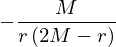

In [153]:
Gamma(-1, 2, 1)

Each component of the _Tensor_ object is computed only once due to memoization procedure implemented in the _Tensor_ class. Computed value of a tensor component is stored in _components_ dictionary (attribute of a _Tensor_ instance) and returned by the next call to the instance.

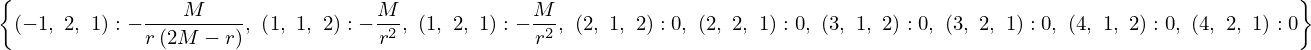

In [154]:
Gamma.components

The above dictionary consists of two elements because the symmetry of the Christoffel symbols is implemented in the _Christoffel_ class. 

If necessary, you can clear the _components_ dictionary

In [132]:
#Gamma.components = {}
#Gamma.components

The _Matrix_ representation of the Christoffel symbols is the following

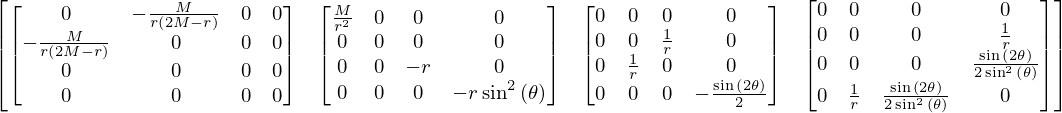

In [155]:
Gamma(-All, All, All)

You can get help on any of classes mentioned before by running the command

In [205]:
#help(Christoffel)

Gamma.is_tensor

True

Try also "_Christoffel?_" and  "_Christoffel??_"

## 2.2 黎曼张量 (_Riemann_ tensor)

## (GraviPy 定义) $$ R_{\mu \nu \rho \sigma} = \frac{\partial \Gamma_{\mu \nu \sigma}}{\partial x^{\rho}} - \frac{\partial \Gamma_{\mu \nu \rho}}{\partial x^{\sigma}} + \Gamma^{\alpha}_{\ \nu \sigma}\Gamma_{\mu \rho \alpha} - \Gamma^{\alpha}_{\ \nu \rho}\Gamma_{\mu \sigma \alpha} - \frac{\partial g_{\mu \alpha}}{\partial x^{\rho}}\Gamma^{\alpha}_{\ \nu \sigma} + \frac{\partial g_{\mu \alpha}}{\partial x^{\sigma}}\Gamma^{\alpha}_{\ \nu \rho} $$

##  (讲义 1.46) $$ R^{\rho}_{\ \mu \sigma \nu} = \frac{\partial \Gamma^{\rho}_{\ \mu \nu}}{\partial x^{\sigma}} - \frac{\partial \Gamma^{\rho}_{\ \mu \sigma}}{\partial x^{\nu}} + \Gamma^{\rho}_{\ \alpha \sigma} \Gamma^{\alpha}_{\ \mu \nu} - \Gamma^{\rho}_{\ \alpha \nu}\Gamma^{\alpha}_{\ \mu \sigma} $$

In [159]:
Rm = Riemann('Rm', g)

### 输出 $R^{\mu}_{\ \nu \rho \sigma}$ 的部分非零分量

In [160]:
from IPython.display import display, Math
from sympy import latex
for i, j, k, l in list(variations(range(1, 5), 4, True)):
    if Rm(i, j, k, l) != 0 and k<l and i<j:
        display(Math('R_{'+str(i)+str(j)+str(k)+str(l)+'} = '+ latex(Rm(-i, j, k, l))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

### 显示 $R^{\mu}_{\ \nu \rho \sigma}$

In [201]:
#Rm(-All, All, All, All)

### 缩并黎曼张量 (Contraction of the _Riemann_ tensor) 
### $R_{\mu \nu} = R^{\rho}_{\ \mu \rho \nu} $

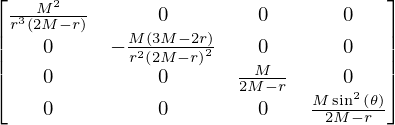

In [178]:
ricci = sum([Rm(i, All, k, All)*g(-i, -k)
             for i, k in list(variations(range(1, 5), 2, True))],
            zeros(4))
ricci.simplify()
ricci

## 2.3 里奇张量 (_Ricci_ tensor)

##  (讲义 1.47) $$ R^{\sigma}_{\ \mu \sigma \nu} = R_{\mu \nu} = \frac{\partial \Gamma^{\sigma}_{\ \mu \nu}}{\partial x^{\sigma}} - \frac{\partial \Gamma^{\sigma}_{\ \mu \sigma}}{\partial x^{\nu}} + \Gamma^{\sigma}_{\ \alpha \sigma} \Gamma^{\alpha}_{\ \mu \nu} - \Gamma^{\sigma}_{\ \alpha \nu}\Gamma^{\alpha}_{\ \mu \sigma} $$

## (GraviPy 定义) $$ R_{\mu \nu} = \frac{\partial \Gamma^{\sigma}_{\ \mu \nu}}{\partial x^{\sigma}} - \frac{\partial \Gamma^{\sigma}_{\ \mu \sigma}}{\partial x^{\nu}} + \Gamma^{\rho}_{\ \sigma \rho}\Gamma^{\sigma}_{\ \mu \nu} - \Gamma^{\rho}_{\ \mu \sigma}\Gamma^{\sigma}_{\ \nu \rho} $$

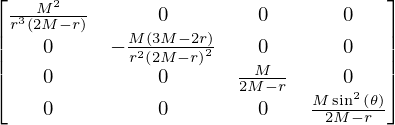

In [156]:
Ri = Ricci('Ri', g)
Ri(All, All)

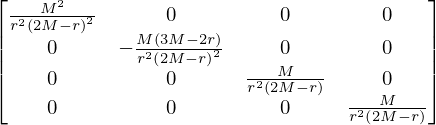

In [197]:
Ri(-All, All)

### 里奇张量缩并 (Contraction of the _Ricci_ tensor) 
### $R = R_{\mu}^{\ \mu} = g^{\mu \nu}R_{\mu \nu}$

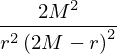

In [158]:
Ri.scalar()

## 2.4 爱因斯坦张量 (The _Einstein_ tensor)

## $$ G_{\mu \nu} = R_{\mu \nu} - \frac{1}{2}g_{\mu \nu}R $$

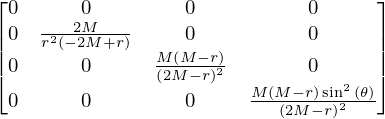

In [179]:
G = Einstein('G', Ri)
G(All, All)

## 2.5 测地线 ( _Geodesics_ )

## $$ w_{\mu} = \frac{Du_{\mu}}{d\tau} = \frac{d^2x_{\mu}}{d\tau^2} - \frac{1}{2}g_{\rho \sigma, \mu} \frac{dx^{\rho}}{d\tau}\frac{dx^{\sigma}}{d\tau} $$

In [184]:
tau = Symbol('\\tau')
w = Geodesic('w', g, tau)
w(All).transpose()

Please note that instantiation of a _Geodesic_ class for the metric $g$ automatically turns on a _Parametrization_ mode for the metric $g$. Then all coordinates are functions of a world line parameter $\tau$

In [185]:
Parametrization.info()

In [186]:
x(-All)

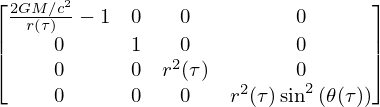

In [117]:
g(All, All)

_Parametrization_ mode can be deactivated by typing

In [187]:
Parametrization.deactivate(x)
Parametrization.info()

No parametrization activated


In [27]:
x(-All)

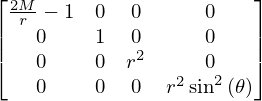

In [188]:
g(All, All)

# 3. 微分 (Derivatives)

## 3.1 偏微分 (Partial derivative)

All instances of a _GeneralTensor_ subclasses inherits _partialD_ method which works exactly the same way as SymPy _diff_ method.

In [189]:
T = Tensor('T', 2, g)
T(1, 2)

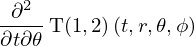

In [190]:
T.partialD(1, 2, 1, 3) # The first two indices belongs to second rank tensor T

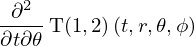

In [191]:
T(1, 2).diff(x(-1), x(-3))

The only difference is that computed value of _partialD_ is saved in  "_partial_derivative_components_" dictionary an then returned by the next call to the _partialD_ method.

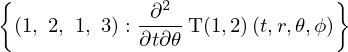

In [192]:
T.partial_derivative_components

## 3.2 协变微分 (Covariant derivative)

### Covariant derivative components of the tensor ___T___  can be computed by the covariantD method from the formula

## $$ \nabla_{\sigma} T_{\mu}^{\ \nu} = T_{\mu \ ;\sigma}^{\ \nu} = \frac{\partial T_{\mu}^{\ \nu}}{\partial x^{\sigma}} - \Gamma^{\rho}_{\ \mu \sigma}T_{\rho}^{\ \nu} + \Gamma^{\nu}_{\ \rho \sigma}T_{\mu}^{\ \rho}$$

Let's compute some covariant derivatives of a scalar field C

In [33]:
C = Tensor('C', 0, g)
C()

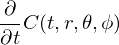

In [34]:
C.covariantD(1)

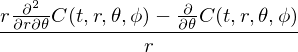

In [35]:
C.covariantD(2, 3)

All _covariantD_ components of every _Tensor_ object are also memoized

In [36]:
for k in C.covariant_derivative_components:
    display(Math(str(k) + ': '
                 + latex(C.covariant_derivative_components[k])))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

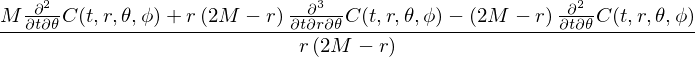

In [37]:
C.covariantD(1, 2, 3)

Proof that the covariant derivative of the metric tensor $g$ is zero

In [38]:
not any([g.covariantD(i, j, k).simplify()
         for i, j, k in list(variations(range(1, 5), 3, True))])

True

Bianchi identity in the Schwarzschild spacetime

## $$ R_{\mu \nu \sigma \rho ;\gamma} + R_{\mu \nu \gamma \sigma ;\rho} + R_{\mu \nu \rho \gamma ;\sigma} = 0$$

In [193]:
not any([(Rm.covariantD(i, j, k, l, m) + Rm.covariantD(i, j, m, k, l)
          + Rm.covariantD(i, j, l, m, k)).simplify()
         for i, j, k, l, m in list(variations(range(1, 5), 5, True))])

True

## User-defined tensors

To define a new scalar/vector/tensor field in some space you should __extend__ the _Tensor_ class or __create an instance__ of the _Tensor_ class.

### _Tensor_ class instantiation

Let's create a third-rank tensor field living in the Schwarzshild spacetime as an instance of the _Tensor_ class

In [40]:
S = Tensor('S', 3, g)

Until you define (override) the _\_compute\_covariant\_component_ method of the __S__ object, all of $4^3$ components are arbitrary functions of coordinates 

In [41]:
S(1, 2, 3)

In [42]:
inspect.getsourcelines(T._compute_covariant_component)

(['    def _compute_covariant_component(self, idxs):\n',
  '        if len(idxs) == 0:\n',
  '            component = Function(str(self.symbol))(*self.coords.c)\n',
  '        elif len(idxs) == 1:\n',
  '            component = Function(str(self.symbol) +\n',
  "                                 '(' + str(idxs[0]) + ')')(*self.coords.c)\n",
  '        else:\n',
  '            component = Function(str(self.symbol) + str(idxs))(*self.coords.c)\n',
  '        return component\n'],
 157)

Let's assume that tensor __S__ is the commutator of the covariant derivatives of some arbitrary vector field __V__ and create a new _\_compute\_covariant\_component_ method for the object __S__

In [43]:
V = Tensor('V', 1, g)
V(All)

In [44]:
def S_new_method(idxs): # definition
    component = (V.covariantD(idxs[0], idxs[1], idxs[2])
                 - V.covariantD(idxs[0], idxs[2], idxs[1])).simplify()
    S.components.update({idxs: component}) # memoization
    return component
S._compute_covariant_component = S_new_method
# _compute_covariant_component method was overriden

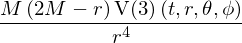

In [45]:
S(1, 1, 3)

One can check that the well known formula is correct

$$ V_{\mu ;\nu \rho} - V_{\mu ;\rho \nu} = R^{\sigma}_{\ \mu \nu \rho}V_{\sigma} $$

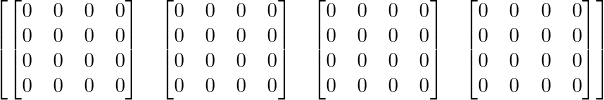

In [46]:
zeros = reduce(Matrix.add, [Rm(-i, All, All, All)*V(i)
                            for i  in range(1, 5)]) - S(All, All, All)
zeros.simplify()
zeros

Another way of tensor creation is to make an instance of the _Tensor_ class with components option. Tensor components stored in _Matrix_ object are  writen to the _components_ dictionary of the instance by this method. 

In [47]:
Z = Tensor('Z', 3, g, components=zeros, components_type=(1, 1, 1))

In [48]:
not any(Z.components.values())

True

### _Tensor_ class extension

As an example of the _Tensor_ class extension you can get the source code of any of the predefined _Tensor_ subclasses

In [49]:
print([cls.__name__ for cls in vars()['Tensor'].__subclasses__()])

['Christoffel', 'Ricci', 'Riemann', 'Einstein', 'Geodesic']


In [50]:
inspect.getsourcelines(Christoffel)

(['class Christoffel(Tensor):\n',
  '    r"""Christoffel.\n',
  '\n',
  '    Represents a class of Christoffel symbols of the first and second kind.\n',
  '\n',
  '    Parameters\n',
  '    ==========\n',
  '\n',
  '    symbol : python string - name of the Christoffel symbol\n',
  '    metric : GraviPy MtricTensor object\n',
  '\n',
  '    Examples\n',
  '    ========\n',
  '\n',
  '    Define a Christoffel symbols for the Schwarzschild metric:\n',
  '\n',
  '    >>> from gravipy import *\n',
  "    >>> t, r, theta, phi = symbols('t, r, \\\\theta, \\phi')\n",
  "    >>> chi = Coordinates('\\chi', [t, r, theta, phi])\n",
  "    >>> M = Symbol('M')\n",
  '    >>> Metric = diag(-(1 - 2 * M / r), 1 / (1 - 2 * M / r), r ** 2,\n',
  '    ...                  r ** 2 * sin(theta) ** 2)\n',
  "    >>> g = MetricTensor('g', chi, Metric)\n",
  "    >>> Ga = Christoffel('Ga', g)\n",
  '    >>> Ga(-1, 2, 1)\n',
  '    -M/(r*(2*M - r))\n',
  '    >>> Ga(2, All, All)\n',
  '    Matrix([\n',
  '    [M